# PyTorch

Основные преимущества:

1.   Динамические графы
2.   Удобная работа с тензорами
3.   Удобное управление вычислениями на cuda, cpu ...
4.   Autograd - автоматическое вычисление градиентов




In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Базовые операции

In [2]:
e  = torch.eye(2)
e

tensor([[1., 0.],
        [0., 1.]])

In [4]:
print('Shape:', e.size())
print('How many dimensions? - ', e.dim())

Shape: torch.Size([2, 2])
How many dimensions? -  2


В `empty()` создастся "мусор"

In [5]:
v = torch.empty(10)
v

tensor([ 2.2006e+01,  4.5759e-41,  1.3897e-34,  0.0000e+00,  3.8838e+34,
         4.5758e-41,  4.6810e-06, -6.4572e+01,  3.8945e+34,  4.5758e-41])

In [6]:
z = torch.zeros(10)
z

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Удобный синтаксис для создания N-мерных векторов.

In [7]:
z = torch.zeros(4, 3)
z

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Функции `view` и `reshape`.

In [8]:
z = torch.randn(2, 3)
z

tensor([[ 0.3939,  0.7940,  0.2567],
        [ 0.8680, -1.0954,  0.4009]])

In [9]:
z.view(6, 1)

tensor([[ 0.3939],
        [ 0.7940],
        [ 0.2567],
        [ 0.8680],
        [-1.0954],
        [ 0.4009]])

In [10]:
z

tensor([[ 0.3939,  0.7940,  0.2567],
        [ 0.8680, -1.0954,  0.4009]])

In [11]:
z.reshape(6, 1)

tensor([[ 0.3939],
        [ 0.7940],
        [ 0.2567],
        [ 0.8680],
        [-1.0954],
        [ 0.4009]])

In [12]:
z

tensor([[ 0.3939,  0.7940,  0.2567],
        [ 0.8680, -1.0954,  0.4009]])

Операции с матрицами

In [13]:
x = torch.randn(4, 5)
x

tensor([[ 0.1907,  0.0809,  2.8421,  0.7175, -0.2436],
        [ 1.3892,  1.0218,  0.1679,  1.1300,  0.2892],
        [-0.8004, -0.0906,  0.3114, -0.2665, -0.0548],
        [ 0.2561, -0.7805, -0.8311,  1.6108, -0.9476]])

In [14]:
x.t()

tensor([[ 0.1907,  1.3892, -0.8004,  0.2561],
        [ 0.0809,  1.0218, -0.0906, -0.7805],
        [ 2.8421,  0.1679,  0.3114, -0.8311],
        [ 0.7175,  1.1300, -0.2665,  1.6108],
        [-0.2436,  0.2892, -0.0548, -0.9476]])

Обратите внимание на полезные методы с нижним подчёркиванием в конце. Они позволяют изменять тензоры "на месте", без создания копий.

In [15]:
x.t_()
x

tensor([[ 0.1907,  1.3892, -0.8004,  0.2561],
        [ 0.0809,  1.0218, -0.0906, -0.7805],
        [ 2.8421,  0.1679,  0.3114, -0.8311],
        [ 0.7175,  1.1300, -0.2665,  1.6108],
        [-0.2436,  0.2892, -0.0548, -0.9476]])

Подобные методы имеются и для сложения и вычитания матриц.



In [16]:
a = torch.randn((3, 4))
b = torch.randn((4, 5))

In [17]:
a @ b

tensor([[-1.6782,  3.3915,  1.9474, -1.2195,  1.4262],
        [-3.5112, -0.2653, -0.7529,  1.2340, -3.2191],
        [-0.2290, -0.7078, -1.7841, -0.1520, -0.1150]])

In [18]:
a.matmul(b)

tensor([[-1.6782,  3.3915,  1.9474, -1.2195,  1.4262],
        [-3.5112, -0.2653, -0.7529,  1.2340, -3.2191],
        [-0.2290, -0.7078, -1.7841, -0.1520, -0.1150]])

In [19]:
a = torch.randn(3, 4)
b = torch.randn(3, 4)

In [20]:
a + b

tensor([[2.4090, 0.7474, 0.2132, 1.7008],
        [1.3075, 1.0717, 0.1434, 0.3755],
        [0.7267, 2.0207, 1.1185, 0.0273]])

In [21]:
a.add_(b)
a

tensor([[2.4090, 0.7474, 0.2132, 1.7008],
        [1.3075, 1.0717, 0.1434, 0.3755],
        [0.7267, 2.0207, 1.1185, 0.0273]])

In [22]:
a - b

tensor([[ 1.0568,  0.9122, -0.8319,  1.9972],
        [ 0.9869,  0.5860, -0.7614,  0.0843],
        [-0.0186,  0.1631,  0.5314, -0.8616]])

In [23]:
b.sub_(a)
b

tensor([[-1.0568, -0.9122,  0.8319, -1.9972],
        [-0.9869, -0.5860,  0.7614, -0.0843],
        [ 0.0186, -0.1631, -0.5314,  0.8616]])

# Перейдём к простым нейронным сетям! :)

### Recap Neural Networks

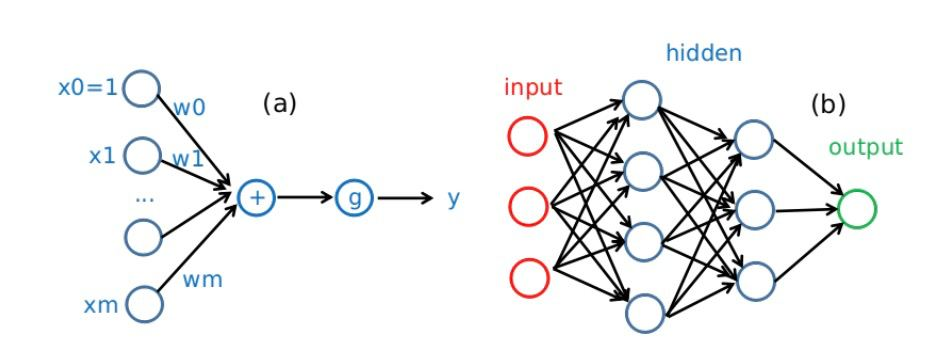

Как и почти каждая supervised задача в ML - это задача оптимизации и для этого необходимо определить loss-функцию.

В данном случае представлена классическая для задач классификации - функция кросс-энтропии. 

# **$$J = -\sum\limits_{(X, y_k) \in S} \sum\limits_{k=1}^K {\log {\widehat{y_k}} (X, w)}.$$**

Для того, чтобы посчитать градиент loss-функции по каждому параметру, можно воспользоваться правилом дифференцирования сложной функции (chain rule)

# $$\frac{\partial z}{\partial x_i} = \sum\limits_j {\frac{\partial z}{\partial y_j} \frac{\partial y_j}{\partial x_i}}$$

Формальный алгоритм BackProp

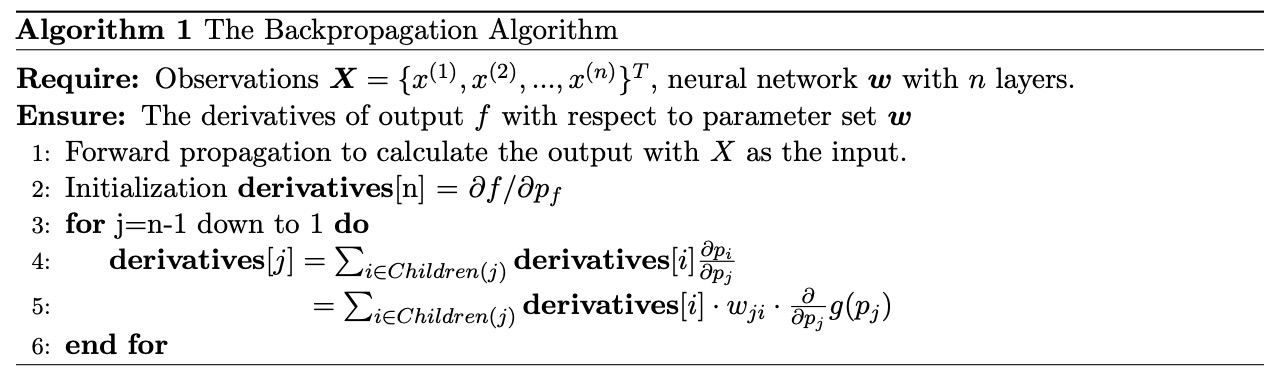

Не забываем обновить веса


# $$w = w - 𝞰 \nabla _ w J(w; X, y)$$<br>








Иллюстрация алгоритма на небольшом примере

$$y = \sin \left(x_2^2(x_1 + x_2)\right)$$

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0010465515004099-gr1.jpg" width=700></img>


### Базовый Autograd

#### Пример 1

In [24]:
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

In [25]:
y = w * x + b

In [26]:
y

tensor(5., grad_fn=<AddBackward0>)

In [27]:
print(x.grad)
print(w.grad)
print(b.grad)

None
None
None


In [28]:
y.backward()

In [29]:
print(x.grad)
print(w.grad)
print(b.grad)

tensor(2.)
tensor(1.)
tensor(1.)


#### Пример 2

In [30]:
x = torch.randn(10, 3)
y = torch.randn(10, 2)

In [31]:
y

tensor([[-0.1430,  0.4048],
        [-0.1076,  1.4232],
        [-0.3697, -0.3030],
        [-0.7712,  0.3723],
        [ 1.1488, -0.5405],
        [-0.5520,  0.7476],
        [-1.3768,  0.4261],
        [ 0.3426, -0.4567],
        [ 0.1563,  0.1616],
        [ 0.7274,  1.3891]])

In [32]:
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

w:  Parameter containing:
tensor([[-0.3756,  0.3148, -0.1176],
        [ 0.5104,  0.5065,  0.5622]], requires_grad=True)
b:  Parameter containing:
tensor([0.4171, 0.1367], requires_grad=True)


In [33]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

In [34]:
pred = linear(x)

In [35]:
pred

tensor([[ 1.0226,  0.4098],
        [ 0.8578, -2.1839],
        [ 0.6331,  0.0833],
        [ 0.3417, -1.7436],
        [ 0.4585, -0.0860],
        [-0.1099,  0.7920],
        [-0.1198,  0.1173],
        [ 0.5614,  0.0760],
        [-1.0555,  0.2628],
        [ 0.6246,  0.9214]], grad_fn=<AddmmBackward0>)

In [36]:
loss = criterion(pred, y)
print('loss: ', loss.item())

loss:  1.3383738994598389


In [37]:
loss.backward()

In [38]:
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

dL/dw:  tensor([[-0.4148,  0.0456, -0.3574],
        [ 0.6723,  0.6987,  0.8727]])
dL/db:  tensor([ 0.4160, -0.4975])


In [39]:
optimizer.step()

# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

### Пример итеративной оптимизации функции потерь

In [40]:
import matplotlib.pyplot as plt

In [41]:
max_iter = 10
steps, losses = [], []

for iter in range(1, 9):
  pred = linear(x)
  loss = criterion(pred, y)
  print(f'loss after 1 step optimization at {iter + 1}th step:', loss.item())

  steps.append(iter)
  losses.append(loss.item())

  loss.backward()
  optimizer.step()
  optimizer.zero_grad()

loss after 1 step optimization at 2th step: 1.314297080039978
loss after 1 step optimization at 3th step: 1.267462968826294
loss after 1 step optimization at 4th step: 1.245321273803711
loss after 1 step optimization at 5th step: 1.2237824201583862
loss after 1 step optimization at 6th step: 1.202829360961914
loss after 1 step optimization at 7th step: 1.182445764541626
loss after 1 step optimization at 8th step: 1.1626157760620117
loss after 1 step optimization at 9th step: 1.1433236598968506


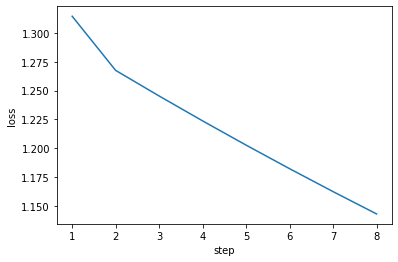

In [43]:
plt.plot(steps, losses)
plt.xlabel('step')
plt.ylabel('loss')
plt.show()

### Логистическая регрессия

In [44]:
batch_size = 100

In [45]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw



In [46]:
input_size = 28 * 28
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [47]:
model = nn.Linear(input_size, num_classes)

In [48]:
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [49]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 2.1989
Epoch [1/5], Step [200/600], Loss: 2.0971
Epoch [1/5], Step [300/600], Loss: 1.9734
Epoch [1/5], Step [400/600], Loss: 1.9293
Epoch [1/5], Step [500/600], Loss: 1.8229
Epoch [1/5], Step [600/600], Loss: 1.7801
Epoch [2/5], Step [100/600], Loss: 1.7227
Epoch [2/5], Step [200/600], Loss: 1.6840
Epoch [2/5], Step [300/600], Loss: 1.5863
Epoch [2/5], Step [400/600], Loss: 1.6019
Epoch [2/5], Step [500/600], Loss: 1.4429
Epoch [2/5], Step [600/600], Loss: 1.4842
Epoch [3/5], Step [100/600], Loss: 1.4638
Epoch [3/5], Step [200/600], Loss: 1.4744
Epoch [3/5], Step [300/600], Loss: 1.3204
Epoch [3/5], Step [400/600], Loss: 1.2655
Epoch [3/5], Step [500/600], Loss: 1.2315
Epoch [3/5], Step [600/600], Loss: 1.2585
Epoch [4/5], Step [100/600], Loss: 1.1824
Epoch [4/5], Step [200/600], Loss: 1.2665
Epoch [4/5], Step [300/600], Loss: 1.2256
Epoch [4/5], Step [400/600], Loss: 1.1387
Epoch [4/5], Step [500/600], Loss: 1.2143
Epoch [4/5], Step [600/600], Loss:

In [50]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the model on the 10000 test images: 83.08000183105469 %


### Полносвязная нейронная сеть

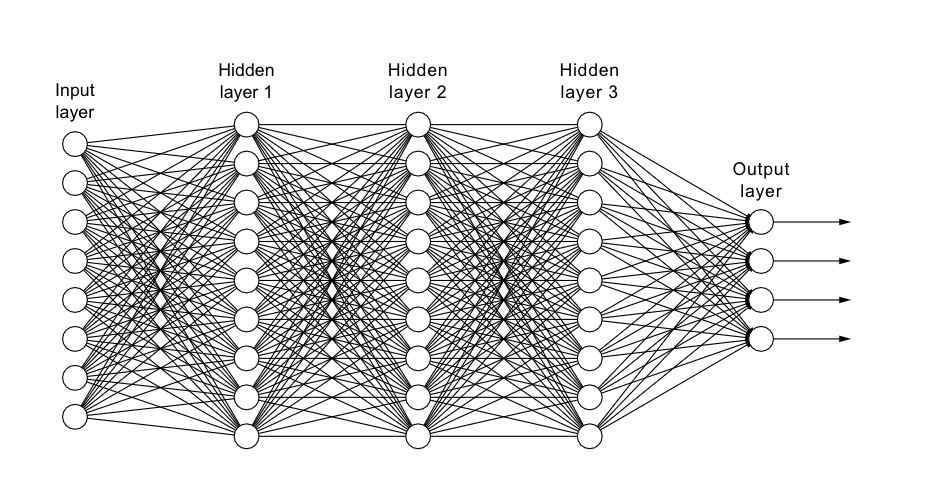

In [51]:
hidden_size = 500

In [52]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [53]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [54]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [55]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

In [56]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.3500
Epoch [1/5], Step [200/600], Loss: 0.1627
Epoch [1/5], Step [300/600], Loss: 0.2985
Epoch [1/5], Step [400/600], Loss: 0.2394
Epoch [1/5], Step [500/600], Loss: 0.1230
Epoch [1/5], Step [600/600], Loss: 0.2107
Epoch [2/5], Step [100/600], Loss: 0.0994
Epoch [2/5], Step [200/600], Loss: 0.1329
Epoch [2/5], Step [300/600], Loss: 0.1462
Epoch [2/5], Step [400/600], Loss: 0.1299
Epoch [2/5], Step [500/600], Loss: 0.0360
Epoch [2/5], Step [600/600], Loss: 0.0558
Epoch [3/5], Step [100/600], Loss: 0.0455
Epoch [3/5], Step [200/600], Loss: 0.0957
Epoch [3/5], Step [300/600], Loss: 0.0697
Epoch [3/5], Step [400/600], Loss: 0.0781
Epoch [3/5], Step [500/600], Loss: 0.1094
Epoch [3/5], Step [600/600], Loss: 0.0941
Epoch [4/5], Step [100/600], Loss: 0.0424
Epoch [4/5], Step [200/600], Loss: 0.0865
Epoch [4/5], Step [300/600], Loss: 0.0375
Epoch [4/5], Step [400/600], Loss: 0.0365
Epoch [4/5], Step [500/600], Loss: 0.0570
Epoch [4/5], Step [600/600], Loss:

In [57]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 97.85 %


### Сверточная нейронная сеть

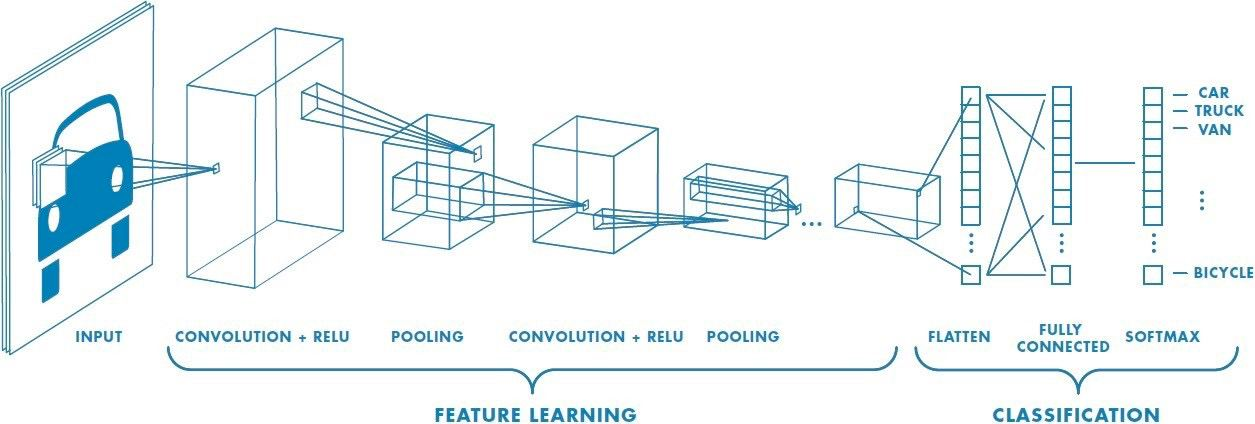

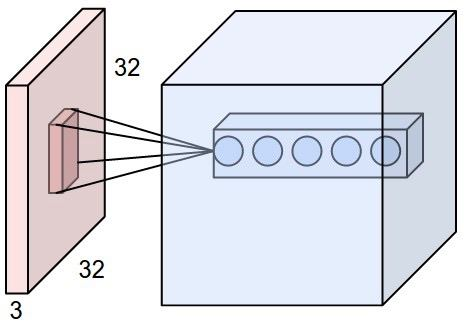

https://cs231n.github.io/convolutional-networks/

In [58]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

In [59]:
model = ConvNet(num_classes).to(device)

In [60]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [61]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.1398
Epoch [1/5], Step [200/600], Loss: 0.0585
Epoch [1/5], Step [300/600], Loss: 0.0463
Epoch [1/5], Step [400/600], Loss: 0.0385
Epoch [1/5], Step [500/600], Loss: 0.0440
Epoch [1/5], Step [600/600], Loss: 0.0419
Epoch [2/5], Step [100/600], Loss: 0.0154
Epoch [2/5], Step [200/600], Loss: 0.0156
Epoch [2/5], Step [300/600], Loss: 0.0383
Epoch [2/5], Step [400/600], Loss: 0.0595
Epoch [2/5], Step [500/600], Loss: 0.0155
Epoch [2/5], Step [600/600], Loss: 0.0603
Epoch [3/5], Step [100/600], Loss: 0.0219
Epoch [3/5], Step [200/600], Loss: 0.0162
Epoch [3/5], Step [300/600], Loss: 0.0633
Epoch [3/5], Step [400/600], Loss: 0.0208
Epoch [3/5], Step [500/600], Loss: 0.0271
Epoch [3/5], Step [600/600], Loss: 0.0312
Epoch [4/5], Step [100/600], Loss: 0.0423
Epoch [4/5], Step [200/600], Loss: 0.0321
Epoch [4/5], Step [300/600], Loss: 0.0524
Epoch [4/5], Step [400/600], Loss: 0.0194
Epoch [4/5], Step [500/600], Loss: 0.0490
Epoch [4/5], Step [600/600], Loss:

In [62]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 98.71 %
